# Praktikum Informationstechnik im Maschinenbau II
## P11 - Machine Learning mit Python

## Aufgabe 2 - Perceptron für alle drei Klassen

Die Aufgabe besteht aus den Teilschritten:
1. Datensatz von Webseite einlesen (wie Aufgabe 1)
2. Vorverarbeitung des Datensatzes (Standardisierung)
3. Trainieren eine Perceptrons und Prüfung des Ergebnisses

Teillösungen entnehmen Sie bitte der Aufgabe 1

### Teilschritt 1: Datensatz von Webseite einlesen (wie Aufgabe 1)

In [1]:
# Standard-Imports (numpy, matplotlib, pandas)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Einlesen in Dataframe (die Spalten sollen 'sl', 'sw', 'pl', 'pw' und 'species' heißen)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sl', 'sw', 'pl', 'pw', 'species'], header= None)
df

,sl,sw,pl,pw,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# Umwandeln der Spalte "species" in Datentyp category
df.species = df.species.astype('category')

In [4]:
# Anzeige der enthaltenen Kategorien (mittels "Accessor" .cat)
df.species.cat.categories

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')

> Warum wandeln wir in "category"? Die Daten aus der Klassenzugehörigkeit sind Strings, sklearn benötigt in vielen Fällen numerische Labels. (Solange wir nur klassifizieren, können die Labels auch andere Datentypen sein.) 

In [5]:
# Anzeige der Zahlencodes  (mittels "Accessor" .cat)
df.species.cat.codes

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int8

In [6]:
print(df['species'].cat.codes)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int8


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   sl       150 non-null    float64 
 1   sw       150 non-null    float64 
 2   pl       150 non-null    float64 
 3   pw       150 non-null    float64 
 4   species  150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


### Teilschritt 2: Vorverarbeitung des Datensatzes (Standardisierung)
- Extrahieren der Featurematrix `X` und des Labelvektors `y`
- Standardisieren der Daten (Transformation auf Mittelwert 0 und Varianz 1) mittels `StandardScaler`


In [23]:
# StandardScaler importieren
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split 

In [24]:
# "Feature-Matrix" X (Zeilenauswahl: nur setosa und versicolor). Spalten sl und pl. Umwandlung in numpy-Array mit .to_numpy()
X = df.loc[: , ['sl', 'pl']].to_numpy()

In [25]:
# Label-Vektor (Zeilenauswahl wie X, Labels sind Zahlencodes). Umwandlung in numpy-Array mit .to_numpy())
y = df.loc[: , 'species'].cat.codes.to_numpy()

In [26]:
sc=StandardScaler()
sc.fit(X)
X_std = sc.transform(X)
X_std.var()

1.0

In [27]:
# Aufsplitten von X in X_train und X_test und y in y_train und y_test im Verhältnis 70/30 mittels Hilfsfunktion train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [28]:
# Erzeugen einer Instanz und Einstellen der Parameter max_iter=4000 und eta0=0.1
ppn = Perceptron(max_iter=4000, eta0=0.1)

In [ ]:
# Anwendung des Standardscalers auf den Datensatz


In [30]:
# Anpassen der Gewichte und Schwellwerte an die Daten (Lernen) mittels .fit()
ppn.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=4000)

In [31]:
# Erzeugen der Labels zu den Testdaten mit .predict() 
y_pred = ppn.predict(X_test)
y_pred

array([1, 1, 0, 2, 2, 0, 2, 0, 0, 1, 1, 1, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0,
       1, 1, 0, 1, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 0, 2, 1, 0, 1, 1, 2, 2,
       0], dtype=int8)

In [32]:
# Prüfen auf Übereinstimmung und Ausgabe des prozentualen Anteil der falsch klassifierten
richtig = y_pred == y_test
f'richtig vorhergesagt {richtig.sum()}, falsh vorhergesagt {np.logical_not(richtig).sum()}'

'richtig vorhergesagt 42, falsh vorhergesagt 3'

In [33]:
# im Falle von nur zwei Features können wir die Klassifikation auch grafisch prüfen. Importieren Sie dazu `plot_decision_regions' aus der gleichnamigen .py-Datei 
from plot_decision_regions import plot_decision_regions

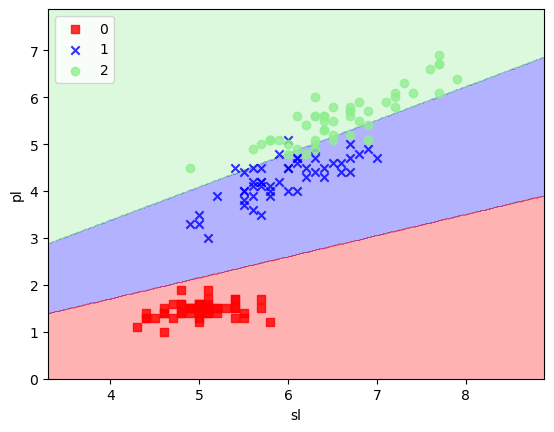

In [34]:
plot_decision_regions(X, y, classifier=ppn)

### Teilschritt 3: Trainieren eine Perceptrons und Prüfung des Ergebnisses

Einzige Änderung gegenüber Aufgabe 1: Es werden die standardisierten Daten `X_std` benutzt

In [ ]:
# Importieren der Klasse Perceptron und der Hilfsfunktion train_test_split von sklearn
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split 

In [ ]:
# Aufteilen in Trainings- und Testdatensatz aus X_std(!)  und y

In [ ]:
# Perceptron erzeugen und trainieren


In [ ]:
# Anwenden des Perceptrons auf die Testdaten


In [ ]:
# Prüfen auf Übereinstimmung und Ausgabe des prozentualen Anteil der falsch klassifierten


In [ ]:
# im Falle von nur zwei Features können wir die Klassifikation auch grafisch prüfen. Importieren Sie dazu `plot_decision_regions' aus der gleichnamigen .py-Datei 
from plot_decision_regions import plot_decision_regions

In [ ]:
plot_decision_regions(